In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from matplotlib import rcParams
import pandas as pd
import os
import tqdm
from collections import Counter
from matplotlib.colors import LogNorm

from DataContainers.Experiment import Experiment
from PythonHeplers.IOHelpers import do_with_all_subfolders
from DataAnalyzers.PicksAnalyzer import calc_picks

from Models.Higgins1D.Higgins1DConfiguration import Higgins1DConfiguration, Higgins1DTdmaParameters
from Models.Higgins1D.Higgins1DTdmaSolver import integrate_tdma_implicit_scheme
from MathHelpers.InitDataHelpers import get_cos, get_normal_rand

%matplotlib inline

In [3]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = (16, 8)

### Данные 
Рассматриваются длины отрезков [1, 2, 5, 10, 20, 40, 80, 160]

Сырые данные можно взять [здесь](https://drive.google.com/file/d/1Dk7O1wyybosCDjPPZe5MGn77SiDUFXxG/view?usp=sharing)


In [4]:
base_dir = 'C:\\Users\\alexandr.pankratov\\Desktop\\bbb'
subfolders = sorted(list(os.walk(base_dir))[0][1], key=lambda x: int(x.split('_')[-1]))
subfolders

['x_max_1',
 'x_max_2',
 'x_max_5',
 'x_max_10',
 'x_max_20',
 'x_max_40',
 'x_max_80',
 'x_max_160']

x_max_1
(0, None) 100


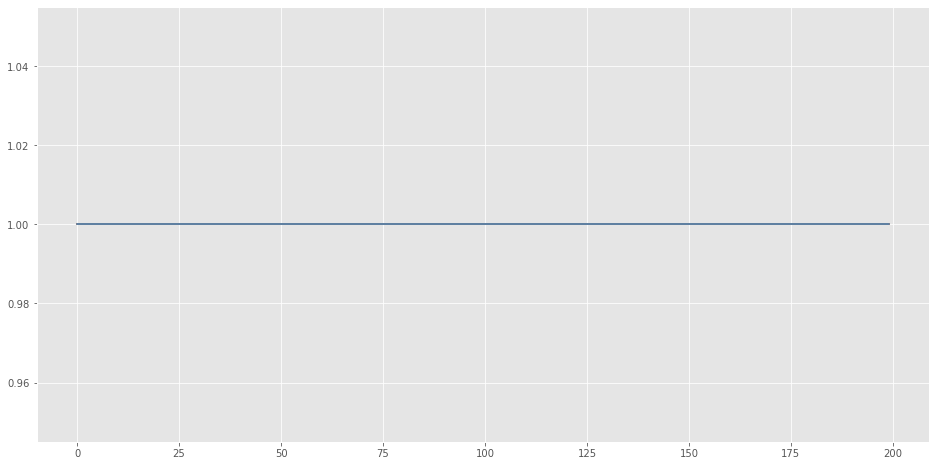

x_max_2
(0, None) 100


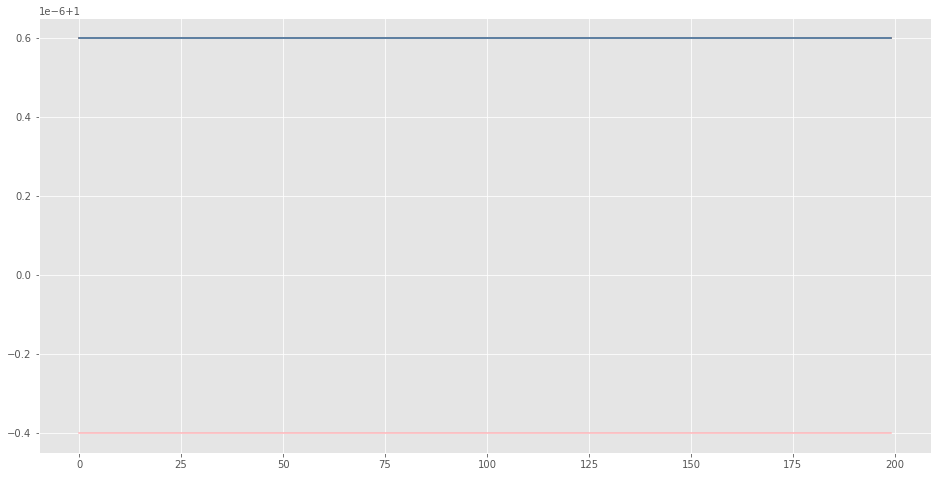

x_max_5
(0.0, 'up') 58
(0.0, 'down') 42


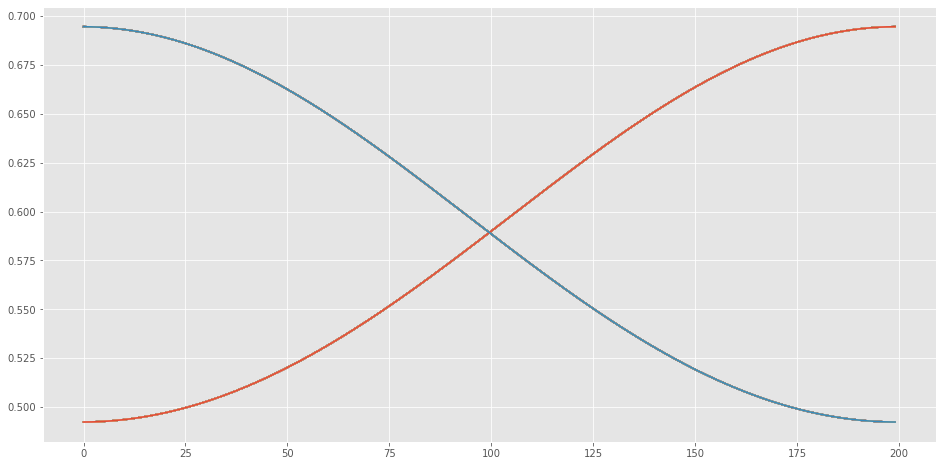

x_max_10
(0.0, 'down') 40
(0.0, 'up') 51
(1.0, 'up') 9


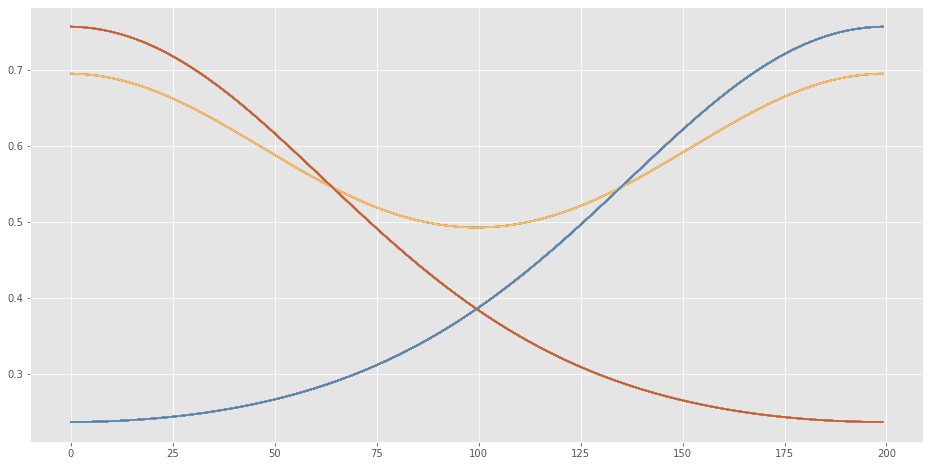

x_max_20
(1.0, 'up') 41
(1.0, 'down') 19
(1.5, 'down') 24
(1.5, 'up') 16


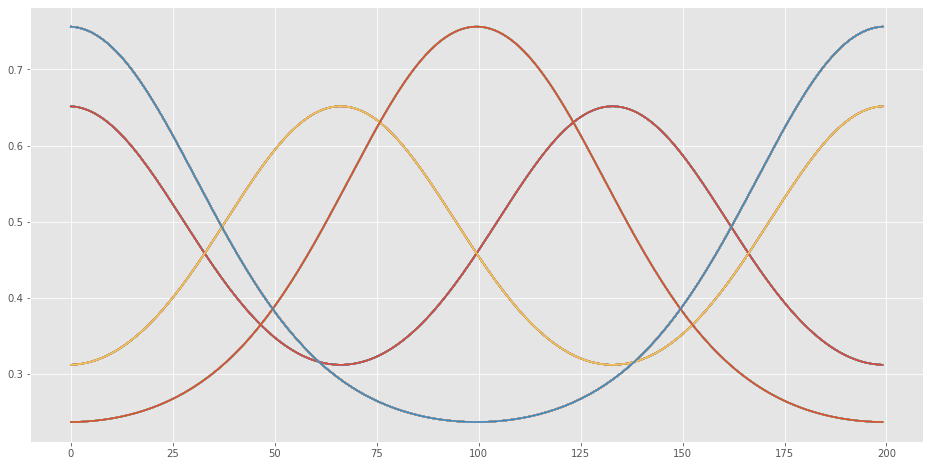

x_max_40
(2.0, 'up') 23
(2.0, 'down') 11
(2.5, 'up') 33
(2.5, 'down') 24
(3.0, 'up') 8
(3.0, 'down') 1


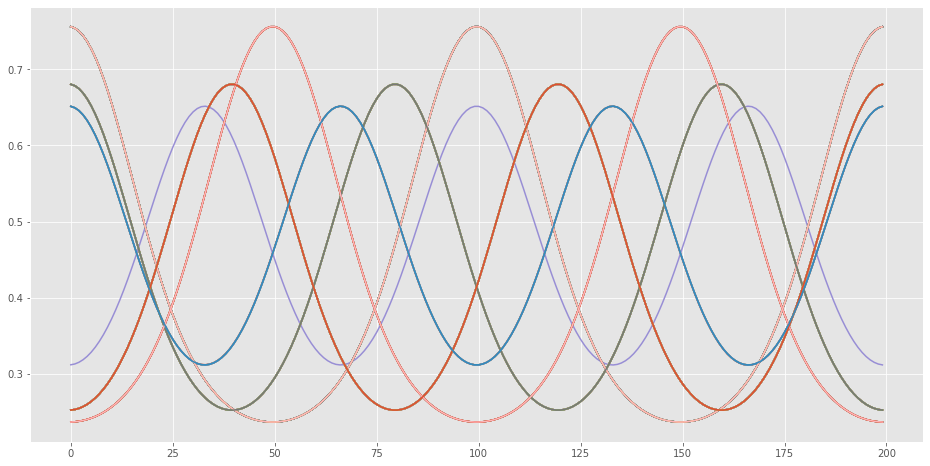

x_max_80
(4.0, 'up') 4
(4.0, 'down') 2
(4.5, 'down') 16
(4.5, 'up') 23
(5.0, 'down') 16
(5.0, 'up') 33
(5.5, 'down') 4
(5.5, 'up') 2


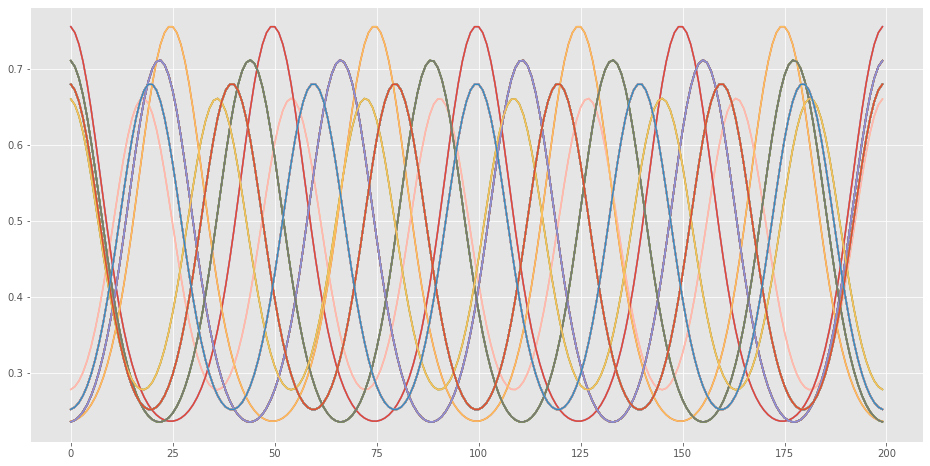

x_max_160
(8.0, 'up') 2
(8.5, 'up') 4
(8.5, 'down') 6
(9.0, 'down') 8
(9.0, 'up') 11
(9.5, 'up') 13
(9.5, 'down') 17
(10.0, 'down') 7
(10.0, 'up') 17
(10.5, 'down') 8
(10.5, 'up') 6
(11.0, 'up') 1


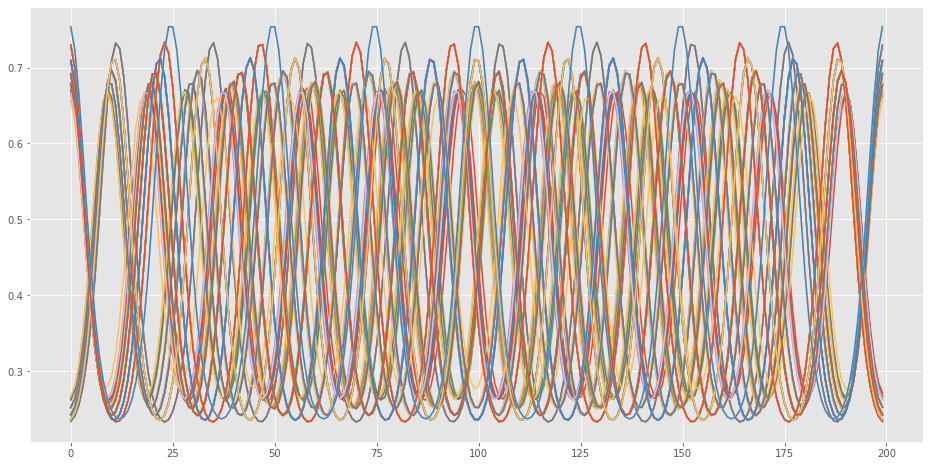

In [5]:
for folder in subfolders:
    data = list(do_with_all_subfolders(os.path.join(base_dir,folder), lambda x: Experiment().fill_from_file_Higgins_legacy_format(x)))
    print(folder)
    stats = dict(Counter(sorted(map(lambda x: tuple(calc_picks(x.end_values['u']).values()), data), key=lambda x: x[0])))
    for k in stats:
        print(k, stats[k])
    ax = plt.gca()
    for d in data:
        ax.plot(d.end_values['u'])
    plt.show()

<table style="font-size:1.5em;  border: 2px solid black;">
    <caption>Итого, для p=2,q=2, Du=20, Dv=1 и случайных стартовых данных</caption>
    <tr>
        <td>x_max</td>
        <td>1</td>
        <td>2</td>
        <td>5</td>
        <td>10</td>
        <td>20</td>
        <td>40</td>
        <td>80</td>
        <td>160</td>
    <\tr>
    <tr>
        <td>структуры</td>
        <td>-</td>
        <td>-</td>
        <td>0.5</td>
        <td>1</td>
        <td>1.5</td>
        <td>3, 3.5</td>
        <td>6, 6.5, 7</td>
        <td>12, 12.5, 13, 13.5, 14, 14.5</td>
    <\tr>
</table>

In [67]:
conf = Higgins1DConfiguration(2.0, 2.0, 20.0, 1)
res = []
for x_max in tqdm.tqdm(np.linspace(4,5,50)):
    u_init = get_cos(0.5,200,1.0, 0.1)
    v_init = get_cos(0.5,200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.005 * x_max, 0.01, 5000.0, True, 100)
    res.append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████| 50/50 [10:27<00:00, 12.55s/it]


In [143]:
dirr = '/home/alexandr/Desktop/L от 13 до 16/'
for num, r in enumerate(res_5):
    r.save(dirr+str(num))

4.551020408163265


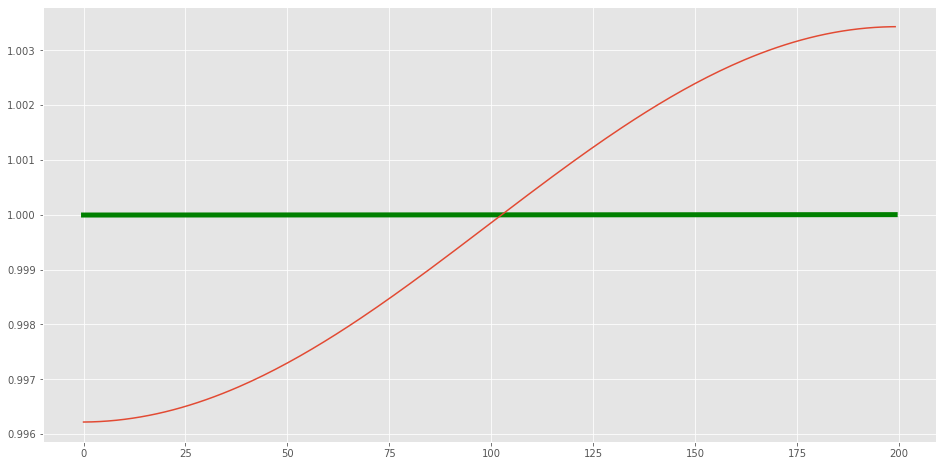

4.0 0
4.020408163265306 0
4.040816326530612 0
4.061224489795919 0
4.081632653061225 0
4.1020408163265305 0
4.122448979591836 0
4.142857142857143 0
4.163265306122449 0
4.183673469387755 0
4.204081632653061 0
4.224489795918367 0
4.244897959183674 0
4.26530612244898 0
4.285714285714286 0
4.3061224489795915 0
4.326530612244898 0
4.346938775510204 0
4.36734693877551 0
4.387755102040816 0
4.408163265306122 0
4.428571428571429 0
4.448979591836735 0
4.469387755102041 0
4.489795918367347 0
4.510204081632653 0
4.530612244897959 0
4.551020408163265 0.0
4.571428571428571 0.0
4.591836734693878 0.0
4.612244897959184 0.0
4.63265306122449 0.0
4.653061224489796 0.0
4.673469387755102 0.0
4.6938775510204085 0.0
4.714285714285714 0.0
4.73469387755102 0.0
4.755102040816326 0.0
4.775510204081632 0.0
4.795918367346939 0.0
4.816326530612245 0.0
4.836734693877551 0.0
4.857142857142857 0.0
4.877551020408164 0.0
4.8979591836734695 0.0
4.918367346938775 0.0
4.938775510204081 0.0
4.959183673469388 0.0
4.9795918367

In [125]:
prev = []
for r in res:
    end_pattern = r.end_values['u']
    if end_pattern.max() - end_pattern.min() > 0.001:
        print(r.method_parameters['dx']*r.init_values['u'].shape[0])
        plt.plot(prev, c='g', lw=5)
        plt.plot(end_pattern)
        plt.show()
        break
    prev = end_pattern
for r in res:
    print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(r.end_values['u'])['picks'])

In [99]:
conf = Higgins1DConfiguration(2.0, 2.0, 20.0, 1)
res_1 = []
for x_max in tqdm.tqdm(np.linspace(9,9.5,20)):
    u_init = get_cos(1,200,1.0, 0.1)
    v_init = get_cos(1,200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.005 * x_max, 0.01, 5000.0)
    res_1.append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████| 20/20 [10:40<00:00, 32.04s/it]


9.105263157894736 {'picks': 1.0, 'direction': 'down'}


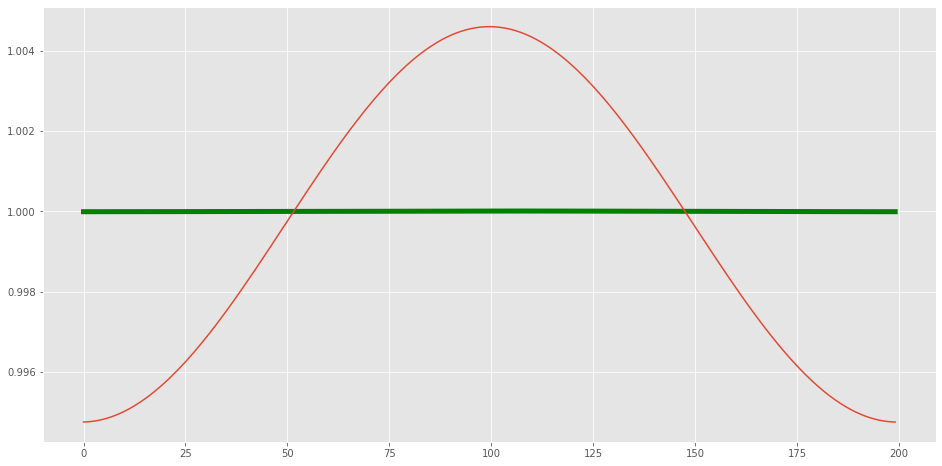

9.0 0
9.026315789473685 0
9.052631578947368 0
9.078947368421053 0
9.105263157894736 1.0
9.131578947368421 1.0
9.157894736842104 1.0
9.18421052631579 1.0
9.210526315789474 1.0
9.236842105263158 1.0
9.263157894736842 1.0
9.289473684210526 1.0
9.31578947368421 1.0
9.342105263157894 1.0
9.368421052631579 1.0
9.394736842105264 1.0
9.421052631578947 1.0
9.447368421052632 1.0
9.473684210526315 1.0
9.5 1.0


In [124]:
prev = []
for r in res_1:
    end_pattern = r.end_values['u']
    if(calc_picks(end_pattern, min_amplitude=0.001)['picks'] >= 1):
        print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(end_pattern, min_amplitude=0.001))
        plt.plot(prev, c='g', lw=5)
        plt.plot(end_pattern)
        plt.show()
        break
    prev = end_pattern
for r in res_1:
    print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(r.end_values['u'])['picks'])

In [130]:
conf = Higgins1DConfiguration(2.0, 2.0, 20.0, 1)
res_4 = []
for x_max in tqdm.tqdm(np.linspace(5,9.5,45)):
    u_init = get_normal_rand(200,1.0, 0.1)
    v_init = get_normal_rand(200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.005 * x_max, 0.01, 5000.0)
    res_4.append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████| 45/45 [09:44<00:00, 13.00s/it]


9.193181818181818 {'picks': 1.0, 'direction': 'down'}


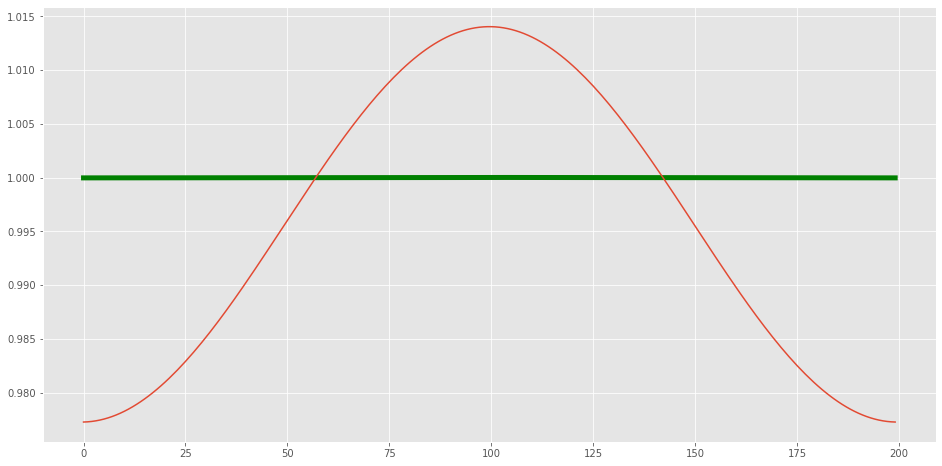

5.0 0.0
5.1022727272727275 0.0
5.204545454545454 0.0
5.306818181818182 0.0
5.409090909090909 0.0
5.511363636363637 0.0
5.613636363636363 0.0
5.715909090909091 0.0
5.818181818181818 0.0
5.920454545454546 0.0
6.0227272727272725 0.0
6.125 0.0
6.2272727272727275 0.0
6.329545454545456 0.0
6.431818181818182 0.0
6.534090909090909 0.0
6.636363636363638 0.0
6.738636363636363 0.0
6.840909090909091 0.0
6.943181818181819 0.0
7.045454545454545 0.0
7.147727272727273 0.0
7.249999999999999 0.0
7.352272727272728 0.0
7.454545454545455 0.0
7.556818181818182 0.0
7.65909090909091 0.0
7.761363636363637 0.0
7.863636363636363 0.0
7.965909090909092 0.0
8.068181818181818 0.0
8.170454545454547 0.0
8.272727272727273 0.0
8.375 0.0
8.477272727272727 0
8.579545454545455 0
8.681818181818182 0
8.78409090909091 0
8.886363636363637 0
8.988636363636363 0
9.09090909090909 0
9.193181818181818 1.0
9.295454545454547 1.0
9.397727272727273 1.0
9.5 1.0


In [133]:
prev = []
for r in res_4:
    end_pattern = r.end_values['u']
    if(calc_picks(end_pattern, min_amplitude=0.001)['picks'] >= 1):
        print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(end_pattern, min_amplitude=0.001))
        plt.plot(prev, c='g', lw=5)
        plt.plot(end_pattern)
        plt.show()
        break
    prev = end_pattern
for r in res_4:
    print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(r.end_values['u'])['picks'])

In [134]:
conf = Higgins1DConfiguration(2.0, 2.0, 20.0, 1)
res_5 = []
for x_max in tqdm.tqdm(np.linspace(13,16,20)):
    u_init = get_cos(1.5, 200,1.0, 0.1)
    v_init = get_cos(1.5, 200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.005 * x_max, 0.001, 5000.0)
    res_5.append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████| 20/20 [22:50<00:00, 68.51s/it] 


14.894736842105264 {'picks': 1.5, 'direction': 'up'}


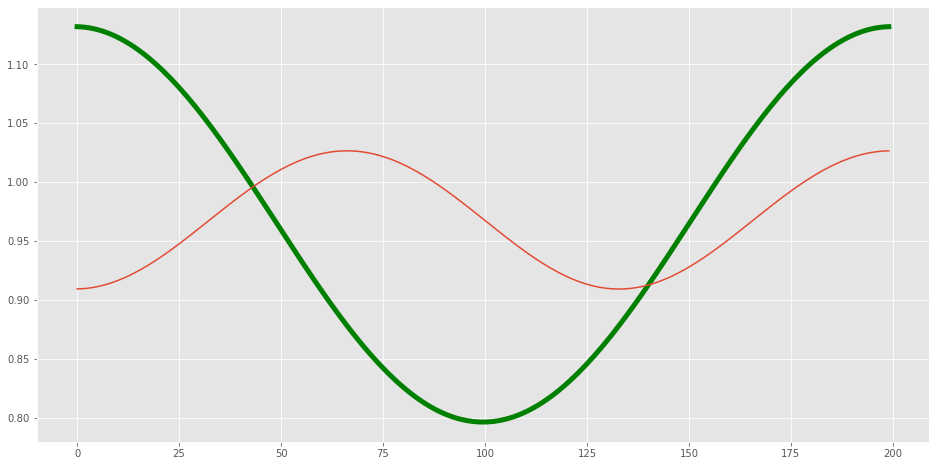

13.0 1.0
13.157894736842104 1.0
13.31578947368421 1.0
13.473684210526315 1.0
13.631578947368423 1.0
13.789473684210526 1.0
13.947368421052634 1.0
14.105263157894738 1.0
14.26315789473684 1.0
14.421052631578949 1.0
14.578947368421053 1.0
14.736842105263156 1.0
14.894736842105264 1.5
15.052631578947368 1.5
15.21052631578947 1.5
15.368421052631579 1.5
15.526315789473685 1.5
15.68421052631579 1.5
15.842105263157894 1.5
16.0 1.5


In [135]:
prev = []
for r in res_5:
    end_pattern = r.end_values['u']
    if(calc_picks(end_pattern, min_amplitude=0.001)['picks'] > 1):
        print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(end_pattern, min_amplitude=0.001))
        plt.plot(prev, c='g', lw=5)
        plt.plot(end_pattern)
        plt.show()
        break
    prev = end_pattern
for r in res_5:
    print(r.method_parameters['dx']*r.init_values['u'].shape[0], calc_picks(r.end_values['u'])['picks'])